<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-joseovalle_A01150742/blob/main/Python_Data_Analysis_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python for Data Analysis - Modulo 3
Alumno: José Ovalle Alvarado
Matrícula:A01150742

In [1]:
# Exploratory Data Analysis (EDA)

# Paso preliminar para:
# Sumarizar características principales de la data
# Obtener un mejor entendimiento de los datos
# Identificar relaciones entre variables
# Extraer variables importantes

# Preguntas principales

# Cuáles son las características más importantes en el precio de los autos?


In [2]:
# Descriptive Statistics
# Group by
# ANOVA
# Correlation
# Correlation - Statistics

Descriptive Statistics

In [3]:
# df.describe()
# df.value_counts()
# box plots - median, upper quartile 75th, lower quartile 25th, upper and lower extreme -- then outliers
# scatter plots

Group - by in python

In [4]:
# dataframe.groupby()
# applied on categorical values
# group data into catagories
# single or multiple variables

# pivot method
# dataframe.pivot(index = , columns)

# pivot table and heatmap
# plot target variable over multiple variables
# plt.pcolor(dataframe, cmap "RdBu")
# plt.colorbar()
# plt.show()

ANOVA (Analysis of Variance)

In [5]:
# statistical comparison of groups
# example. average price of diferente vehicles
# which car feature has the most or the least impact on the price
# find correlatrion between different groups of categorical variable


# ANOVA statistics
# F - test score: variation between sample group means divided by variation within sample group
# p - value: confidence degree


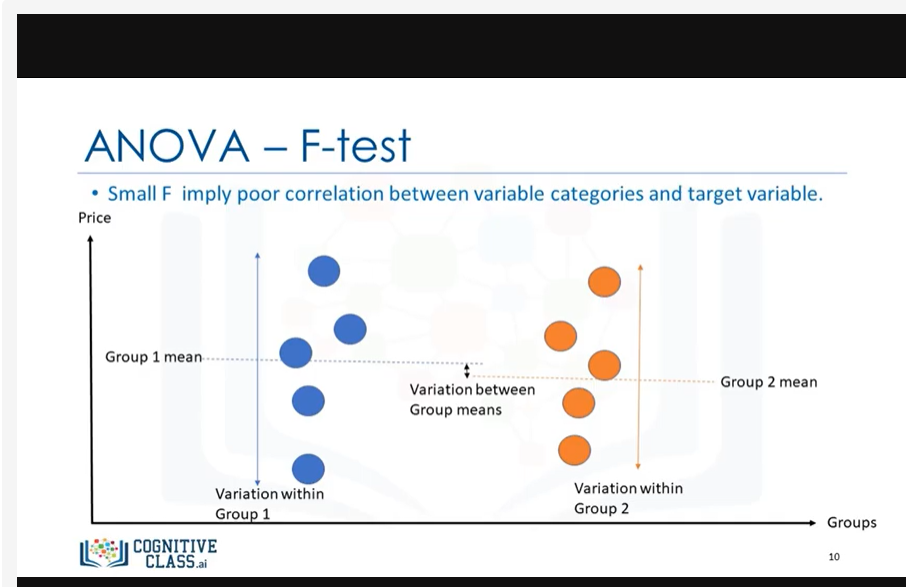

In [6]:
# group 1 honda, group 2, subaru
# f score is low therefore,  correlation between tartget value price and groups is low

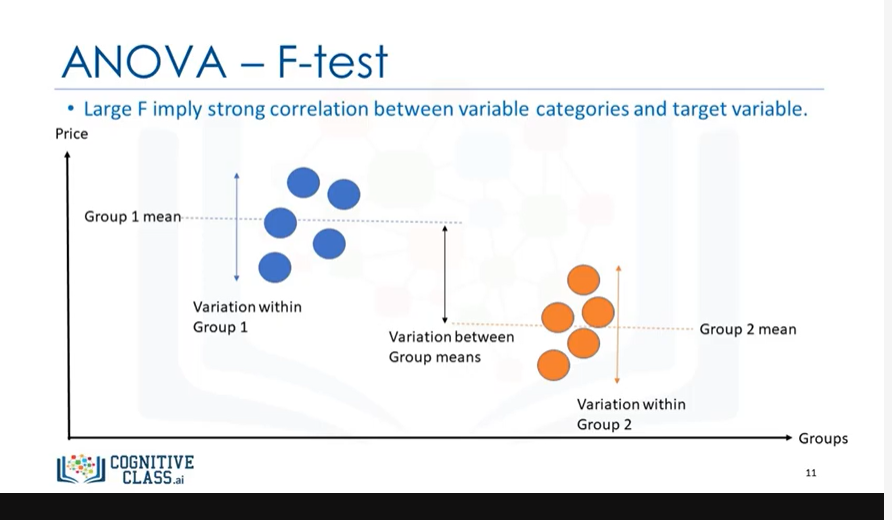

In [7]:
# in this case the variation is more significant

In [8]:
# ANOVA Test
# df_anova = df[["make","price"]]
# grouped_anova = df_anova.groupby([["make"]])
# anova_restuls_1 = stats.f_oneway (grouped_anova.get_group("honda")["price"],grouped_anova.get_group("subaru")["price"])

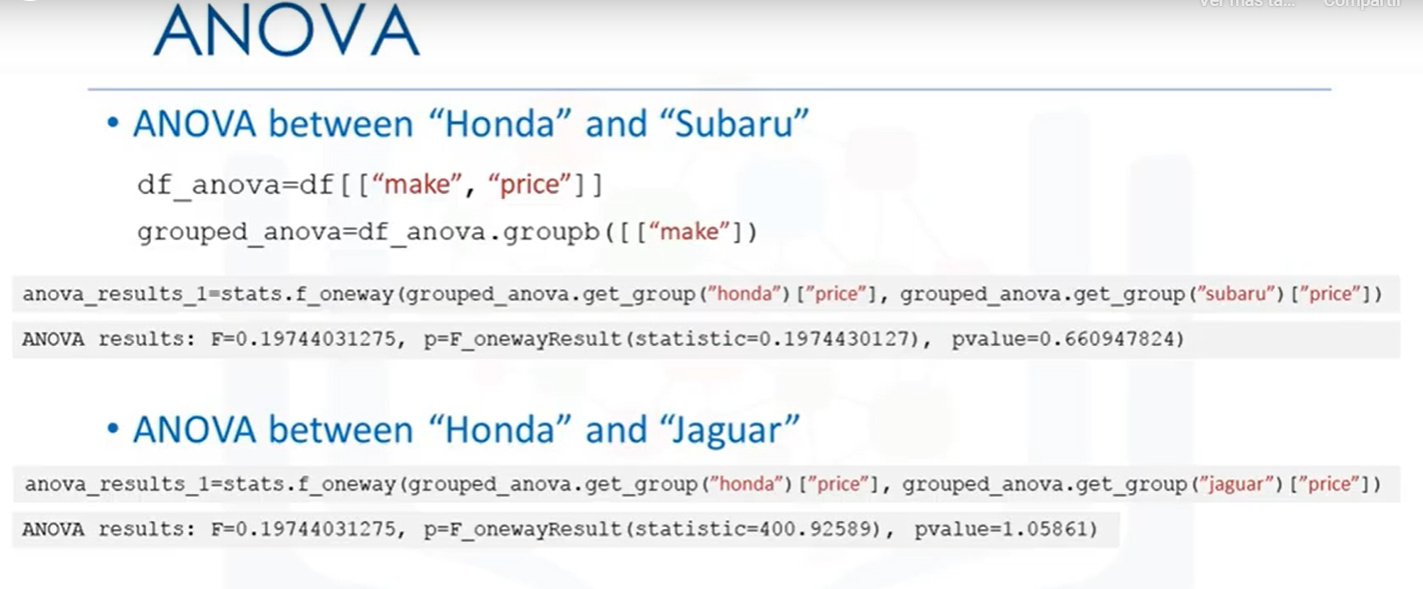

In [9]:
# MORE ABOUT ANOVA 
# https://www.statology.org/what-does-a-high-f-value-mean/#:~:text=What%20is%20this%3F,-Report%20Ad&text=The%20F%2Dvalue%20in%20an%20ANOVA%20is%20calculated%20as%3A%20variation,lower%20the%20corresponding%20p%2Dvalue.


Correlation

In [10]:
# if one variable changes, how does it affect the another variable

# direct correlationship ---  lung cancer to smoking, rain -- umbrella
# correlation doesn't cause causation

# regression line between price and engine size
# regression line between  highway miles per galon an d price
# weak correlation

Correlation - Statistics

In [11]:
# Pearson correlation - correlation coefficient, p - value
# close to 1 , positive correlation
# close to -1, negative correlation
# close to 0, no correlation

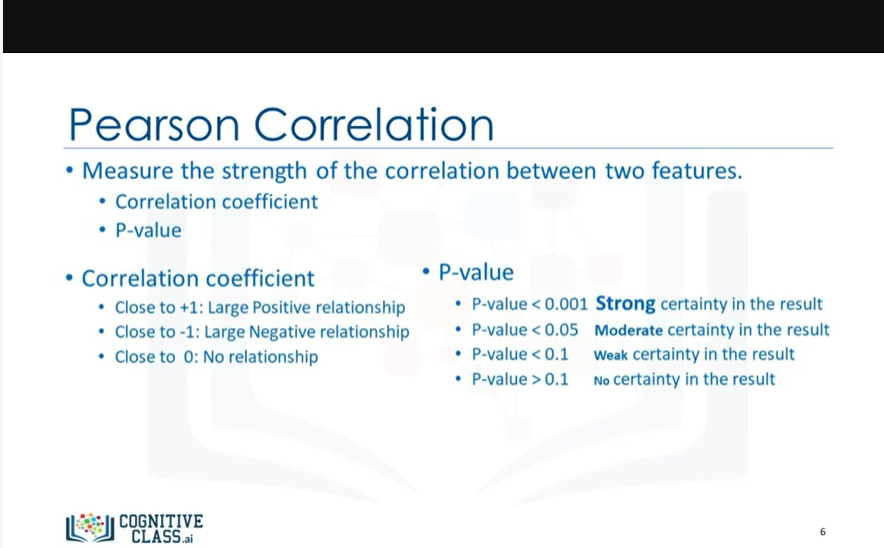

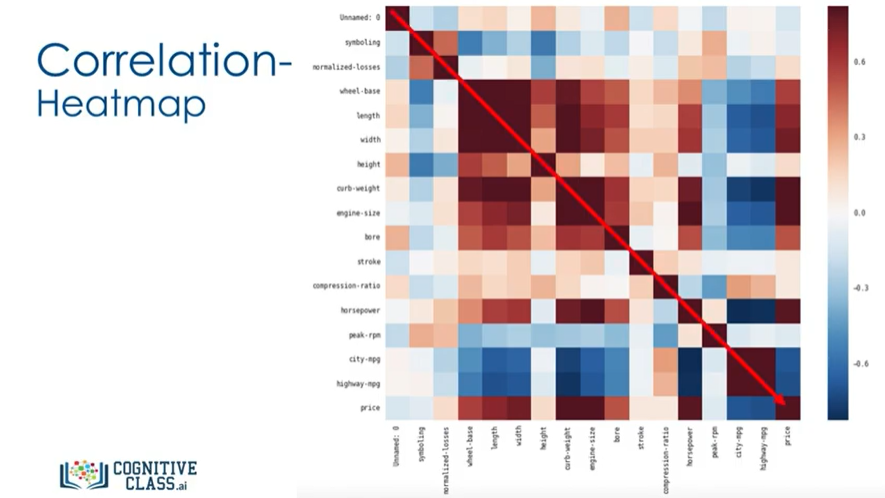

# IMPORT DATA


In [12]:
# import pandas library
import pandas as pd
import numpy as np
# !pip install pyfetch

In [13]:
async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [14]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [15]:
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [17]:
# get data type of each column
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [18]:
# Question #1:
# What is the data type of the column "peak-rpm"?
df["peak-rpm"].dtypes
# type float64

dtype('float64')

# CORRELATION

In [19]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [20]:
# find correlation for bore, stroke, compression-ratio, and horsepower 
df[["bore","stroke","compression-ratio","horsepower"]].head()  #use dataframe with selected columns and then add correlation

,bore,stroke,compression-ratio,horsepower
0,3.47,2.68,9.0,111.0
1,3.47,2.68,9.0,111.0
2,2.68,3.47,9.0,154.0
3,3.19,3.40,10.0,102.0
4,3.19,3.40,8.0,115.0


In [21]:
df[["bore","stroke","compression-ratio","horsepower"]].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


# CONTINOUS NUMERICAL VARIABLES & POSITIVE LINEAR RELATIONSHIP

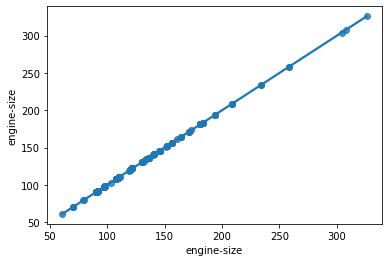

In [22]:
sns.regplot(x ="engine-size", y = "engine-size", data = df);

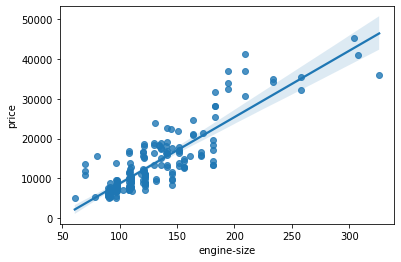

In [23]:
sns.regplot(x ="engine-size", y = "price", data = df);

# there seems to be a correlationship between engine - size and price

In [24]:
df[["engine-size","price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


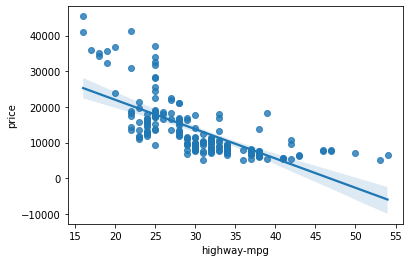

In [25]:
sns.regplot (x= "highway-mpg", y = "price", data = df)
# the higher the "highway-mpg" the lower the price

In [26]:
# weak linear relationship
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


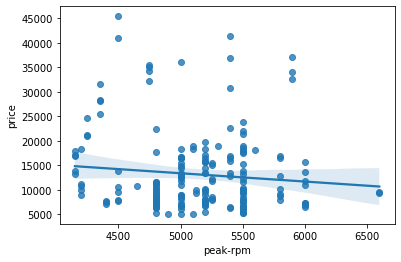

In [27]:
sns.regplot(x="peak-rpm", y="price", data=df);

# CATEGORICAL VARIABLES

In [28]:
# for categorical variables boxplot is the preferred type of analysis to understand distributions among different variables

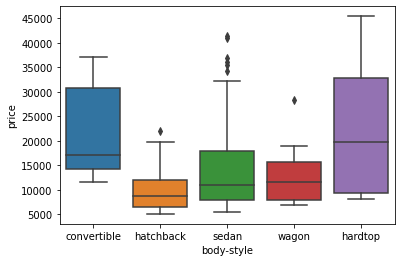

In [29]:
sns.boxplot(x="body-style", y="price", data=df);

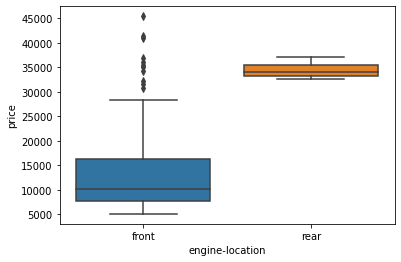

In [30]:
sns.boxplot(x="engine-location",y ="price", data=df);

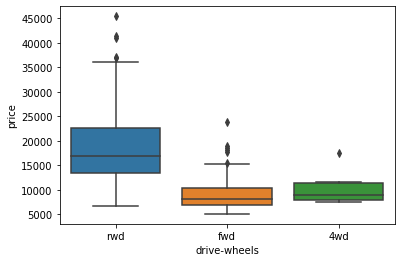

In [31]:
sns.boxplot(x="drive-wheels", y ="price", data =df)

# DESCRIPTIVE STATISTICAL ANALYSIS

In [32]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [33]:
# the describe method ignores "object" types by default, to include them
df.describe(include = "object")

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [34]:
# value counts
df.value_counts() # format isn't friendly

symboling  normalized-losses  make           aspiration  num-of-doors  body-style  drive-wheels  engine-location  wheel-base  length    width     height  curb-weight  engine-type  num-of-cylinders  engine-size  fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg  price    city-L/100km  horsepower-binned  diesel  gas
-2         103                volvo          std         four          sedan       rwd           front            104.3       0.907256  0.933333  56.2    2912         ohc          four              141          mpfi         3.78  3.15    9.5                114.0       5400.0    23        28           12940.0  10.217391     Medium             0       1      1
 1         128                nissan         std         two           sedan       fwd           front            94.5        0.794330  0.886111  54.5    2017         ohc          four              103          idi          2.99  3.47    21.9               55.0        4800.0    45  

In [35]:
type(df.value_counts()) #series

pandas.core.series.Series

In [36]:
df.value_counts().to_frame()

0
symboling normalized-losses make          aspiration num-of-doors body-style drive-wheels engine-location wheel-base length   width    height curb-weight engine-type num-of-cylinders engine-size fuel-system bore stroke compression-ratio horsepower peak-rpm city-mpg highway-mpg price   city-L/100km horsepower-binned diesel gas   
-2        103               volvo         std        four         sedan      rwd          front           104.3      0.907256 0.933333 56.2   2912        ohc         four             141         mpfi        3.78 3.15   9.5               114.0      5400.0   23       28          12940.0 10.217391    Medium            0      1    1
 1        128               nissan        std        two          sedan      fwd          front           94.5       0.794330 0.886111 54.5   2017        ohc         four             103         idi         2.99 3.47   21.9              55.0       4800.0   45       50          7099.0  5.222222     Low               1      0    1
          129               mazda         std        two          hatchback  fwd          front           98.8       0.854397 0.923611 53.7   2385        ohc         four             122         2bbl        3.39 3.39   8.6               84.0       4800.0   26       32          10595.0 9.038462     Low               0      1    1
          148               dodge         std        four         hatchback  fwd          front           93.7       0.755887 0.886111 50.6   1967        ohc         four             90          2bbl        2.97 3.23   9.4               68.0       5500.0   31       38          6229.0  7.580645     Low               0      1    1
                                                                  sedan      fwd          front           93.7       0.755887 0.886111 50.6   1989        ohc         four             90          2bbl        2.97 3.23   9.4               68.0       5500.0   31       38          6692.0  7.580645     Low               0      1    1
...                                                                                                                                                                                                                                                                                                                                     ..
 0        122               mazda         std        four         sedan      rwd          front           104.9      0.840942 0.918056 54.4   2700        ohc         four             134         idi         3.43 3.64   22.0              72.0       4200.0   31       39          18344.0 7.580645     Low               1      0    1
                            mercedes-benz std        four         sedan      rwd          front           120.9      1.000000 0.995833 56.7   3900        ohcv        eight            308         mpfi        3.80 3.35   8.0               184.0      4500.0   14       16          40960.0 16.785714    High              0      1    1
                            peugot        std        four         wagon      rwd          front           114.2      0.955790 0.950000 56.7   3285        l           four             120         mpfi        3.46 2.19   8.4               95.0       5000.0   19       24          16695.0 12.368421    Low               0      1    1
                                                                                                                                       58.7   3230        l           four             120         mpfi        3.46 3.19   8.4               97.0       5000.0   19       24          12440.0 12.368421    Low               0      1    1
 3        256               volkswagen    std        two          hatchback  fwd          front           94.5       0.796252 0.888889 51.4   2221        ohc         four             109         mpfi        3.19 3.40   8.5               90.0       5500.0   24       29          9980.0  9.791667     Low               0      1    1

[196 rows x 1 columns]

In [37]:
# drive wheel counts
drive_wheels_counts = df["drive-wheels"].value_counts().to_frame()
drive_wheels_counts
drive_wheels_counts.rename(columns= {"drive-wheels":"counts"}, inplace = True)
drive_wheels_counts

,counts
fwd,118
rwd,75
4wd,8


In [38]:
doors = df["num-of-doors"].value_counts().to_frame()
doors.rename(columns = {"num-of-doors":"count"}, inplace = True)
doors

,count
four,115
two,86


BASICS OF GROUPING

In [39]:
df["num-of-doors"].unique()

array(['two', 'four'], dtype=object)

In [40]:
# select the columns to group by
features = df[['drive-wheels','body-style','price']] ## there are two features where we can group -by
features

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [41]:
summary = features.groupby(features["drive-wheels"]) # this creates an object
summary.mean() # this can work as weel

,price
drive-wheels,
4wd,10241.000000
fwd,9244.779661
rwd,19757.613333


In [42]:
df_group_one = features.groupby(["drive-wheels"], as_index = False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [43]:
# group by two features and then apply pivot
two_features = features.groupby(["drive-wheels","body-style"], as_index= True).mean()
two_features 

price
drive-wheels body-style               
4wd          hatchback     7603.000000
             sedan        12647.333333
             wagon         9095.750000
fwd          convertible  11595.000000
             hardtop       8249.000000
             hatchback     8396.387755
             sedan         9811.800000
             wagon         9997.333333
rwd          convertible  23949.600000
             hardtop      24202.714286
             hatchback    14337.777778
             sedan        21711.833333
             wagon        16994.222222

In [44]:
# group by two features and then apply pivot
two_features = features.groupby(["drive-wheels","body-style"], as_index= False).mean()
two_features 

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [45]:
grouped_pivot_drive_wheels = two_features.pivot( index = "drive-wheels",columns = 'body-style')
grouped_pivot_drive_wheels

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [46]:
grouped_pivot_body_style = two_features.pivot(index = "body-style", columns = "drive-wheels")
grouped_pivot_body_style


price                            
drive-wheels           4wd           fwd           rwd
body-style                                            
convertible            NaN  11595.000000  23949.600000
hardtop                NaN   8249.000000  24202.714286
hatchback      7603.000000   8396.387755  14337.777778
sedan         12647.333333   9811.800000  21711.833333
wagon          9095.750000   9997.333333  16994.222222

In [47]:
# group prices by body - style only
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

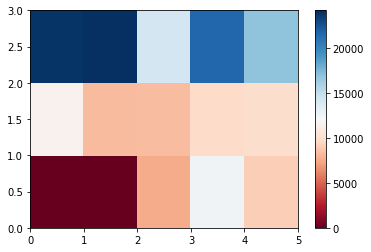

In [48]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

# The default labels convey no useful information to us. Let's change that:

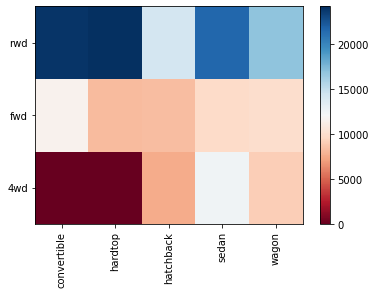

In [49]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

# Correlation and Causation

In [50]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [51]:
# p value for correlation

from scipy import stats

pearson_coef, p_value = stats.pearsonr(df["wheel-base"],df["price"])
print("The pearson correlation coefficient is", pearson_coef, "with a P-value of P =", p_value)


The pearson correlation coefficient is 0.584641822265508 with a P-value of P = 8.076488270733218e-20


Debido a que el p -value < .001, la correlación entre "wheel base price" y el "precio" es estadísticamente significativa, aunque la relación lineal puede no ser lo suficientemente fuerte

Replicando el mismo análisis para diferentes variables:

*   Wheel Base - correlación no es fuerte y estadísticamente significativa
*   Horse - Power - correlación es fuerte y estadísticamente significativa
*   Lenght - correlación moderadamente fuerte y estadísticamente significativa
*   Width - correación fuerte y estadísticamente significativa
*   Curb - weight - correlación fuerte y estadísiticamente significativa
*   Engine - Size - correlación fuerte y estadísticamente significativa  
*   Bore - correlación moderadada y estadísticamente significativa
*   Highway-mpg - correlación modedarada y estadísticamente significativa
*   City-mpg -  correlación moderada y estadísiticamente significativa

# ANOVA - ANALYSIS OF VARIANCE

In [52]:
grouped_test=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [53]:
grouped_test.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

# RESULTADOS DE ANOVA

In [54]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test.get_group('fwd')['price'], grouped_test.get_group('rwd')['price'], grouped_test.get_group('4wd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


La prueba de ANOVA es estadísticamente significativa y la variación entre grupos es estadísticamente significativa por lo cual el tipo de rueda es un factor diferenciador de precios.

In [55]:
# FWD / RWD

In [56]:
f_val, p_val = stats.f_oneway(grouped_test.get_group('fwd')['price'], grouped_test.get_group('rwd')['price'])   
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [57]:
# 4wd / rwd
f_val, p_val = stats.f_oneway(grouped_test.get_group('4wd')['price'], grouped_test.get_group('rwd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


In [58]:
# 4wd / fwd 

In [59]:
f_val, p_val = stats.f_oneway(grouped_test.get_group('4wd')['price'], grouped_test.get_group('fwd')['price'])  
print("ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


# PROGRESO DEL CURSO

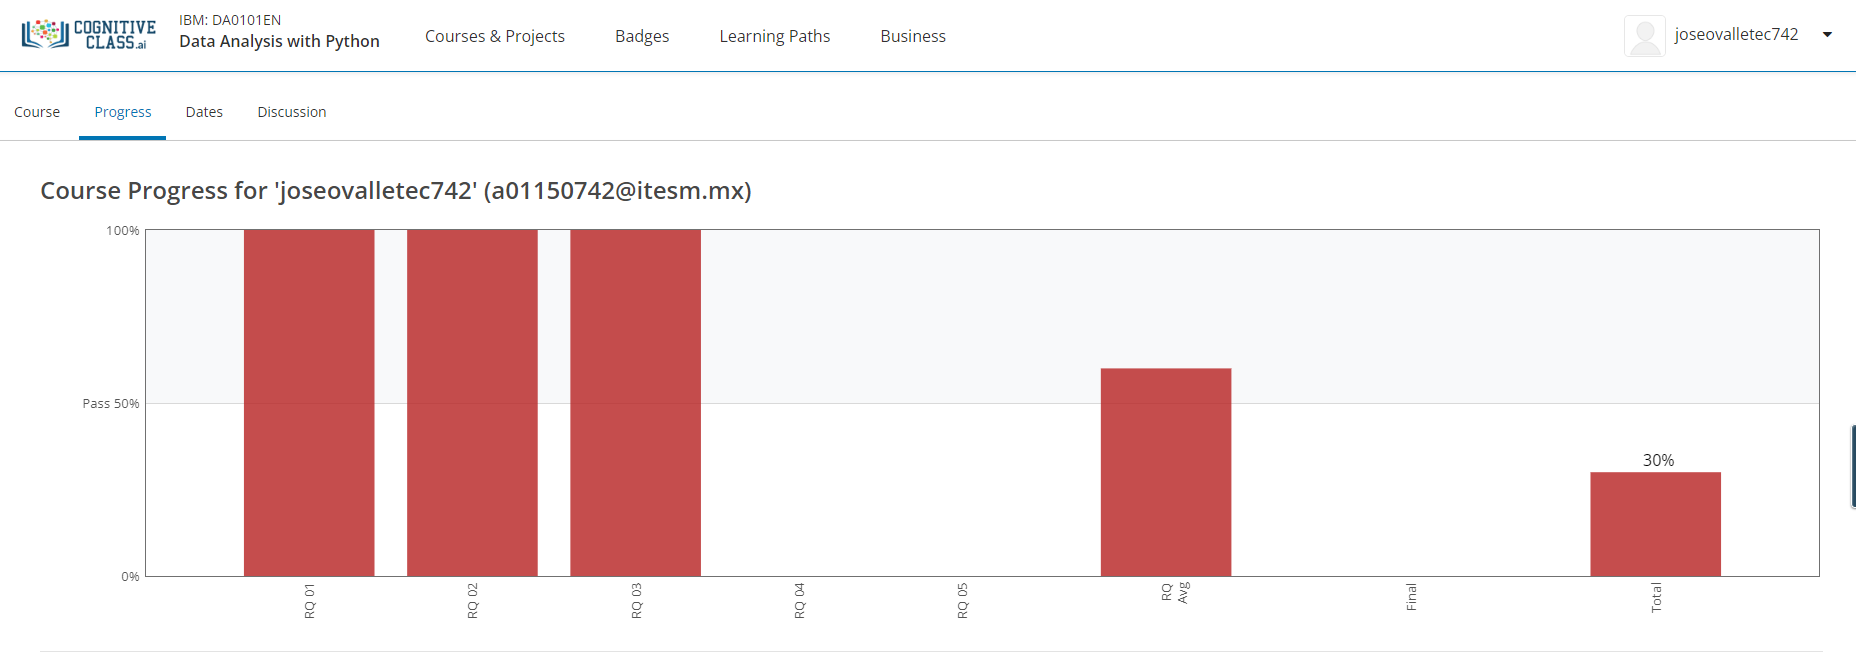